In [1]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json as js
from collections import Counter

In [2]:
pwd

'/Users/mingyuanma/Desktop/HAI/analysis'

In [4]:
before = pd.read_csv("../../data/phase1/before_joint_dim.csv")
before = before.loc[:,["ResponseId", "label_dim1", "label_dim2"]].groupby(
                "ResponseId").agg(lambda x: x.iloc[0])
before

,label_dim1,label_dim2
ResponseId,,
R_0uOsLe6BeLnUee5,3,3
R_10CNCLuGIedQoz2,1,3
R_12nnne04OpWcY9q,2,6
R_1C3aMTZKkeXGDUk,2,4
R_1DS9jhDoVpEt1m2,1,3
...,...,...
R_xA5B0rSmbSjH6XT,2,3
R_yjpyDhIt4Ei7bfX,2,4
R_yw09VUoOXdh6KA1,6,3


In [5]:
after = pd.read_csv("../../data/phase2/after_joint_dim.csv")
after = after.loc[:,["ResponseId", "label_dim1", "label_dim2"]].groupby(
                "ResponseId").agg(lambda x: x.iloc[0])
after

,label_dim1,label_dim2
ResponseId,,
R_0HBxBV8U696D9QJ,2,4
R_0SZ9OfuWvmqeMqR,6,5
R_10DdLv5uPLAfpAR,3,1
R_10Ggl6dEPfo9ipw,1,3
R_10HkPUkR6o0qDFT,9,1
...,...,...
R_yZJ03FFfe8jfazn,9,3
R_ykkhkGYu1KpIM8h,1,3
R_ym9gyf6T2XORxAt,1,3


In [6]:
Counter(before[before["label_dim1"] == 1]["label_dim2"])

Counter({3: 33, 4: 3, 1: 7, 5: 2, 8: 1, 7: 2})

In [7]:
def get_distribution(df):
    types_1 = []
    num = []
    types_2 = []
    for i in np.arange(1, 10):
        counting = Counter(df[df["label_dim1"] == i]["label_dim2"])
        for j in np.arange(1, 10):
            types_1.append(i)
            types_2.append(j)
            num.append(counting[j])
    d = {
        "dim1": types_1,
        "dim2": types_2,
        "frequency": num
    }
    return pd.DataFrame(d)

In [8]:
df = get_distribution(before)
df

,dim1,dim2,frequency
0,1,1,7
1,1,2,0
2,1,3,33
3,1,4,3
4,1,5,2
...,...,...,...
76,9,5,0
77,9,6,0
78,9,7,0
79,9,8,0


In [28]:
df = df.rename(columns = {"dim1":"dim-0 label", "dim2":"dim-1 label"})
df

,dim-0 label,dim-1 label,frequency
0,1,1,7
1,1,2,0
2,1,3,33
3,1,4,3
4,1,5,2
...,...,...,...
76,9,5,0
77,9,6,0
78,9,7,0
79,9,8,0


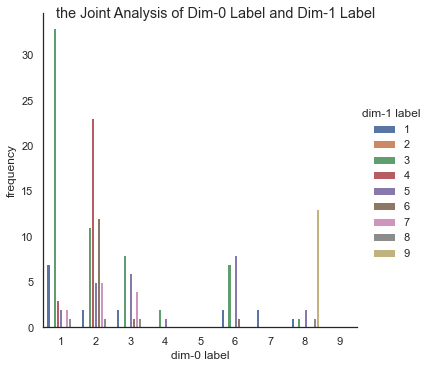

In [31]:
sns.set_style("white")
a = sns.catplot(x="dim-0 label", y="frequency",
                 hue="dim-1 label", 
                 data=df, kind="bar")
a.fig.suptitle(  "the Joint Analysis of Dim-0 Label and Dim-1 Label",
    fontdict= { 'fontsize': 15})
sns.set(rc={'figure.figsize':(100,50)})